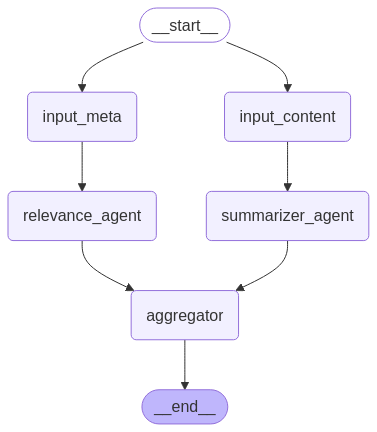

🎓 Final Feedback by Dr. Ahmad Yunus:

Dear [Student Name],

I want to commend you on your insightful analysis of the assignment title and description. Your grasp of the connection between the two and how they effectively guide the student's research is commendable. 

Your discussion of Jakarta and Bangkok as case studies is a good start. To further strengthen your evaluation, I encourage you to delve deeper into the specific successes and failures of their urban planning strategies.  Providing brief examples will add more depth and clarity to your points.

Remember, the effectiveness of an assignment also depends on its intended audience. 

Consider who this assignment is primarily for – are they undergraduate or graduate students? This will help you assess the appropriate level of detail and complexity expected in the research.

Finally, while the assignment is well-structured, always consider potential limitations. For instance, focusing solely on "megacities" might inadvertently exc

In [9]:
import os
import getpass
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing_extensions import TypedDict
from IPython.display import Image, display

# Setup Groq API key
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GROQ_API_KEY")
llm = ChatGroq(model="gemma2-9b-it")

# ----- State definition -----
class AssignmentMeta(TypedDict):
    title: str
    description: str

class State(TypedDict):
    assignment_meta: AssignmentMeta
    assignment_content: str
    summary: str
    relevance_analysis: str
    feedback_analysis: str
    personalized_feedback: str
    combined_output: str

# ----- Input Nodes -----
def input_meta(state: State):
    return {"assignment_meta": state["assignment_meta"]}

def input_content(state: State):
    return {"assignment_content": state["assignment_content"]}

# ----- AI Agent Nodes -----
def summarizer_agent(state: State):
    content = state["assignment_content"]
    msg = llm.invoke(f"Summarize the following assignment content:\n\n{content}")
    return {"summary": msg.content}

def relevance_agent(state: State):
    title = state["assignment_meta"]["title"]
    desc = state["assignment_meta"]["description"]
    prompt = f"""
Analyze the relevance between the following title and description of an assignment:

Title: {title}
Description: {desc}

Does the title appropriately reflect the content described? Provide analysis.
"""
    msg = llm.invoke(prompt)
    return {"relevance_analysis": msg.content}

# ----- Aggregator Node -----
def aggregator(state: State):
    summary = state["summary"]
    relevance = state["relevance_analysis"]

    feedback_prompt = f"""
You are an academic evaluator. Provide constructive feedback based on the following:

SUMMARY:
{summary}

RELEVANCE ANALYSIS:
{relevance}
"""
    feedback = llm.invoke(feedback_prompt).content

    personalization_prompt = f"""
As Professor Dr. Ahmad Yunus, personalize the following academic feedback for a student:

FEEDBACK:
{feedback}
"""
    personalized = llm.invoke(personalization_prompt).content

    combined = f"🎓 Final Feedback by Dr. Ahmad Yunus:\n\n{personalized}"

    return {
        "feedback_analysis": feedback,
        "personalized_feedback": personalized,
        "combined_output": combined
    }

# ----- Build the Graph -----
builder = StateGraph(State)

# Add nodes
builder.add_node("input_meta", input_meta)
builder.add_node("input_content", input_content)
builder.add_node("relevance_agent", relevance_agent)
builder.add_node("summarizer_agent", summarizer_agent)
builder.add_node("aggregator", aggregator)

# Connect edges
builder.add_edge(START, "input_meta")
builder.add_edge(START, "input_content")
builder.add_edge("input_meta", "relevance_agent")
builder.add_edge("input_content", "summarizer_agent")
builder.add_edge("relevance_agent", "aggregator")
builder.add_edge("summarizer_agent", "aggregator")
builder.add_edge("aggregator", END)

# Compile the workflow
workflow = builder.compile()

# Visualize the graph
display(Image(workflow.get_graph().draw_mermaid_png()))

# ----- Run the workflow -----
state = workflow.invoke({
    "assignment_meta": {
        "title": "Sustainable Urban Planning",
        "description": "Analyze urban sustainability strategies in Southeast Asian megacities."
    },
    "assignment_content": """
Urban sustainability in Southeast Asia faces challenges like population density, flooding, and transport inefficiencies.
Green corridors, public transit, and zoning laws can enhance livability.
Jakarta and Bangkok are case studies with both success and setbacks.
"""
})

# Output
print(state["combined_output"])